# reduce data

In [1]:
import numpy as np
solution0 = np.load("data/data0.npy", allow_pickle=True)

FileNotFoundError: [Errno 2] No such file or directory: 'data/data0.npy'

In [16]:
solution0_small=solution0[:100]
solution1_small=solution0[100:200]
with open('data/data_sample0.npy', 'wb') as f:
    np.save(f, solution0_small)
with open('data/data_sample1.npy', 'wb') as f:
    np.save(f, solution1_small)

In [8]:
solution0_small.astype(np.float32).dtype

dtype('float32')

In [11]:
with open('data/data_sample.npy', 'wb') as f:
    np.save(f, solution0_small)

In [12]:
with open('data/data_sample32.npy', 'wb') as f:
    np.save(f, solution0_small.astype(np.float32))

In [3]:
with open('data/data0_sample16.npy', 'wb') as f:
    np.save(f, solution0[:1000].astype(np.float16))
with open('data/data1_sample16.npy', 'wb') as f:
    np.save(f, solution0[1000:2000].astype(np.float16))

# visualize data

In [3]:
import numpy as np
solution = np.load("data/data_sample.npy", allow_pickle=True)
solution.shape

(200, 2, 512, 512)

In [14]:
import cv2
min_val, max_val = solution.min(), solution.max()
scaled_array = ((solution - min_val) / (max_val - min_val) * 255).astype(np.uint8)
fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # Codec for MP4 format
video1 = cv2.VideoWriter('video1.mp4', fourcc, 30, (512, 512))  # 30 fps
video2 = cv2.VideoWriter('video2.mp4', fourcc, 30, (512, 512))  # 30 fps

# Write each frame from the array to the respective videos
for i in range(scaled_array.shape[0]):
    frame1 = scaled_array[i, 0]  # First channel for video1
    frame2 = scaled_array[i, 1]  # Second channel for video2
    
    # Convert frames to BGR (required by OpenCV for video writing)
    frame1_bgr = cv2.cvtColor(frame1, cv2.COLOR_GRAY2BGR)
    frame2_bgr = cv2.cvtColor(frame2, cv2.COLOR_GRAY2BGR)
    
    video1.write(frame1_bgr)
    video2.write(frame2_bgr)

# Release video writers
video1.release()
video2.release()

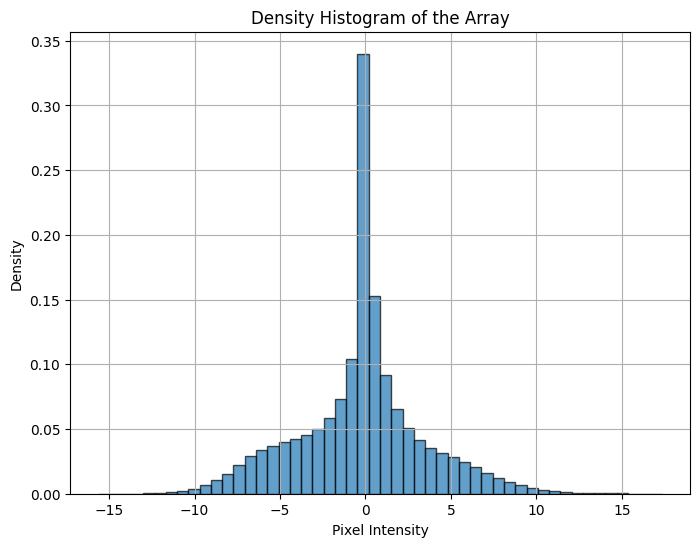

In [11]:
flattened_array = solution[:,1,:,:].flatten()
import matplotlib.pyplot as plt
# Plot the density histogram
plt.figure(figsize=(8, 6))
plt.hist(flattened_array, bins=50, density=True, alpha=0.7, edgecolor='black')
plt.title('Density Histogram of the Array')
plt.xlabel('Pixel Intensity')
plt.ylabel('Density')
plt.grid(True)
plt.show()

# VTK

In [194]:

import vtk
import numpy as np
from vtk.util.numpy_support import vtk_to_numpy as vtk2np


# Function to read the .vtm file
def read_vtm_file(file_path):
# Redirect VTK messages to the console
    ow = vtk.vtkFileOutputWindow()
    ow.SetFileName("vtk_errors.log")
    vtk.vtkOutputWindow().SetInstance(ow)
    # Create a reader for the .vtm file
    reader = vtk.vtkXMLMultiBlockDataReader()
    reader.SetFileName(file_path)
    reader.Update()

    # Get the output of the reader
    multiblock = reader.GetOutput()

    data_blocks = []
    grid_positions = []

    # Iterate through each block (corresponds to each .vtr file)
    for i in range(multiblock.GetNumberOfBlocks()):
        block = multiblock.GetBlock(i)
        if block is not None:
            block_data, position = process_vtr_data(block)
            if block_data is not None:
                data_blocks.append(block_data)
                grid_positions.append(position)

    return data_blocks, grid_positions


# Function to process individual .vtr block
def process_vtr_data(rectilinear_grid: vtk.vtkRectilinearGrid):
    # Get the coordinates
    x_coords = vtk_to_numpy(rectilinear_grid.GetXCoordinates())
    y_coords = vtk_to_numpy(rectilinear_grid.GetYCoordinates())
    z_coords = vtk_to_numpy(rectilinear_grid.GetZCoordinates())
    # Get the point data
    point_data = rectilinear_grid.GetPointData()
    num_arrays = point_data.GetNumberOfArrays()
    data_arrays = []
    for i in range(num_arrays):
        array = vtk_to_numpy(point_data.GetArray(i))
        # Adjust the reshape to account for z being the fastest-changing axis
        array = array.reshape(
            (x_coords.shape[0], y_coords.shape[0], z_coords.shape[0]), order='F'
        )
        data_arrays.append(array)
    i=1
    data_4d_array = np.stack(data_arrays, axis=0)[:,i:-i,i:-i,i:-i]
    return data_4d_array, (x_coords[i:-i], y_coords[i:-i], z_coords[i:-i])
    data_4d_array = np.stack(data_arrays, axis=0)
    return data_4d_array, (x_coords, y_coords, z_coords)


# Helper function to convert VTK arrays to numpy arrays
def vtk_to_numpy(vtk_array):
    return vtk2np(vtk_array)


# Path to the .vtm file
vtm_file_path = r"C:\Users\qcl656\OneDrive - AFRY\Documents\PROJECTS\Total_G-LED\data\NS_mesh3_full_simulation\RESULT\channel.208906.vtm"
# vtm_file_path = "../data/NS_mesh5/RESULT/channel.1300000.vtm"
# vtm_file_path = "../data/NS_mesh5/RESULT/channel.1300000_sample.vtm"
data_blocks, grid_positions = read_vtm_file(vtm_file_path)

In [195]:
len(data_blocks)

128

In [196]:
[grid.shape for grid in grid_positions[0]]

[(16,), (16,), (32,)]

In [197]:
for data_block in data_blocks:
    print(data_block.shape)

(5, 16, 16, 32)
(5, 16, 16, 32)
(5, 16, 16, 32)
(5, 16, 16, 32)
(5, 16, 16, 32)
(5, 16, 16, 32)
(5, 16, 16, 32)
(5, 16, 16, 32)
(5, 16, 16, 32)
(5, 16, 16, 32)
(5, 16, 16, 32)
(5, 16, 16, 32)
(5, 16, 16, 32)
(5, 16, 16, 32)
(5, 16, 16, 32)
(5, 16, 16, 32)
(5, 16, 16, 32)
(5, 16, 16, 32)
(5, 16, 16, 32)
(5, 16, 16, 32)
(5, 16, 16, 32)
(5, 16, 16, 32)
(5, 16, 16, 32)
(5, 16, 16, 32)
(5, 16, 16, 32)
(5, 16, 16, 32)
(5, 16, 16, 32)
(5, 16, 16, 32)
(5, 16, 16, 32)
(5, 16, 16, 32)
(5, 16, 16, 32)
(5, 16, 16, 32)
(5, 16, 16, 32)
(5, 16, 16, 32)
(5, 16, 16, 32)
(5, 16, 16, 32)
(5, 16, 16, 32)
(5, 16, 16, 32)
(5, 16, 16, 32)
(5, 16, 16, 32)
(5, 16, 16, 32)
(5, 16, 16, 32)
(5, 16, 16, 32)
(5, 16, 16, 32)
(5, 16, 16, 32)
(5, 16, 16, 32)
(5, 16, 16, 32)
(5, 16, 16, 32)
(5, 16, 16, 32)
(5, 16, 16, 32)
(5, 16, 16, 32)
(5, 16, 16, 32)
(5, 16, 16, 32)
(5, 16, 16, 32)
(5, 16, 16, 32)
(5, 16, 16, 32)
(5, 16, 16, 32)
(5, 16, 16, 32)
(5, 16, 16, 32)
(5, 16, 16, 32)
(5, 16, 16, 32)
(5, 16, 16, 32)
(5, 16, 

In [198]:
grid_positions[0][2]

array([0.00613281, 0.01839844, 0.03066406, 0.04292969, 0.05519531,
       0.06746094, 0.07972656, 0.09199219, 0.10425781, 0.11652344,
       0.12878906, 0.14105469, 0.15332031, 0.16558594, 0.17785156,
       0.19011719, 0.20238281, 0.21464844, 0.22691406, 0.23917969,
       0.25144531, 0.26371094, 0.27597656, 0.28824219, 0.30050781,
       0.31277344, 0.32503906, 0.33730469, 0.34957031, 0.36183594,
       0.37410156, 0.38636719])

In [199]:
def merge_blocks(data_blocks, grid_positions):
    # Flatten and combine all coordinates along each axis
    x_coords = np.concatenate([pos[0].flatten() for pos in grid_positions])
    y_coords = np.concatenate([pos[1].flatten() for pos in grid_positions])
    z_coords = np.concatenate([pos[2].flatten() for pos in grid_positions])

    # Find unique global coordinates
    x_unique = np.unique(x_coords)
    y_unique = np.unique(y_coords)
    z_unique = np.unique(z_coords)

    # Determine the number of data arrays from the first block
    num_arrays = data_blocks[0].shape[0]

    # Create empty global domain array with an extra dimension for the data arrays
    global_shape = (num_arrays, len(x_unique), len(y_unique), len(z_unique))
    global_array = np.full(global_shape, np.nan)  # Use NaN to identify unfilled regions

    # Create lookup for indices
    x_index = {val: i for i, val in enumerate(x_unique)}
    y_index = {val: i for i, val in enumerate(y_unique)}
    z_index = {val: i for i, val in enumerate(z_unique)}

    # Map each block to the global array
    for block, pos in zip(data_blocks, grid_positions):
        x, y, z = pos
        x_flat = x.flatten()
        y_flat = y.flatten()
        z_flat = z.flatten()

        x_idx = [x_index[val] for val in x_flat]
        y_idx = [y_index[val] for val in y_flat]
        z_idx = [z_index[val] for val in z_flat]

        # Create slices for the block data
        x_slice = slice(min(x_idx), max(x_idx) + 1)
        y_slice = slice(min(y_idx), max(y_idx) + 1)
        z_slice = slice(min(z_idx), max(z_idx) + 1)

        # Insert each data array into the corresponding slice of the global array
        for i in range(num_arrays):
            global_array[i, x_slice, y_slice, z_slice] = block[i]

    return global_array, (x_unique, y_unique, z_unique)


global_domain, coordinates = merge_blocks(data_blocks, grid_positions)
global_domain = global_domain[2:].astype(np.float16)

In [200]:
def merge_blocks(data_blocks, grid_positions):
    import numpy as np

    # Flatten and combine all coordinates along each axis
    x_coords = np.concatenate([pos[0].flatten() for pos in grid_positions])
    y_coords = np.concatenate([pos[1].flatten() for pos in grid_positions])
    z_coords = np.concatenate([pos[2].flatten() for pos in grid_positions])

    # Find unique global coordinates
    x_unique = np.unique(x_coords)
    y_unique = np.unique(y_coords)
    z_unique = np.unique(z_coords)

    # Determine the number of data arrays from the first block
    num_arrays = data_blocks[0].shape[0]

    # Create empty global domain array with an extra dimension for the data arrays
    global_shape = (num_arrays, len(x_unique), len(y_unique), len(z_unique))
    global_array = np.full(global_shape, np.nan)  # Use NaN to identify unfilled regions

    # Initialize overlap counts array
    overlap_counts = np.zeros((len(x_unique), len(y_unique), len(z_unique)), dtype=int)

    # Create lookup for indices
    x_index = {val: i for i, val in enumerate(x_unique)}
    y_index = {val: i for i, val in enumerate(y_unique)}
    z_index = {val: i for i, val in enumerate(z_unique)}

    # Map each block to the global array
    for block, pos in zip(data_blocks, grid_positions):
        x, y, z = pos

        # Ensure x, y, z are 1D arrays
        x = np.array(x).flatten()
        y = np.array(y).flatten()
        z = np.array(z).flatten()

        x_idx = np.array([x_index[val] for val in x])
        y_idx = np.array([y_index[val] for val in y])
        z_idx = np.array([z_index[val] for val in z])

        # Generate meshgrid of indices for proper broadcasting
        x_idx_grid, y_idx_grid, z_idx_grid = np.meshgrid(x_idx, y_idx, z_idx, indexing='ij')

        # Increment overlap counts
        overlap_counts[x_idx_grid, y_idx_grid, z_idx_grid] += 1

        # Insert each data array into the corresponding indices of the global array
        for i in range(num_arrays):
            data = block[i]
            # Ensure data is properly reshaped for indexing
            if data.ndim == 1:
                data = data.reshape((len(x_idx), len(y_idx), len(z_idx)))
            global_array[i, x_idx_grid, y_idx_grid, z_idx_grid] = data

    return global_array, (x_unique, y_unique, z_unique), overlap_counts

# Usage
global_domain, coordinates, overlap_counts = merge_blocks(data_blocks, grid_positions)
global_domain = global_domain[2:].astype(np.float16)


In [201]:
overlap_counts.shape

(128, 64, 128)

In [202]:
print(f"Global domain shape: {global_domain.shape}")
print(f"Coordinates shape: {coordinates[0].shape}, {coordinates[1].shape}, {coordinates[2].shape}")

Global domain shape: (3, 128, 64, 128)
Coordinates shape: (128,), (64,), (128,)


In [203]:
# np.save('global_domain_float64.npy', global_domain)
# np.save('global_domain_float16.npy', global_domain.astype(np.float16))
# global_domain = global_domain.astype(np.float16)

In [204]:
# global_domain = merge_blocks(data_blocks, grid_positions)
global_value = np.count_nonzero(~np.isnan(global_domain))
values = sum(np.count_nonzero(~np.isnan(block)) for block in data_blocks)
print(f"Coverage ratio: {global_value / values}")


Coverage ratio: 0.6


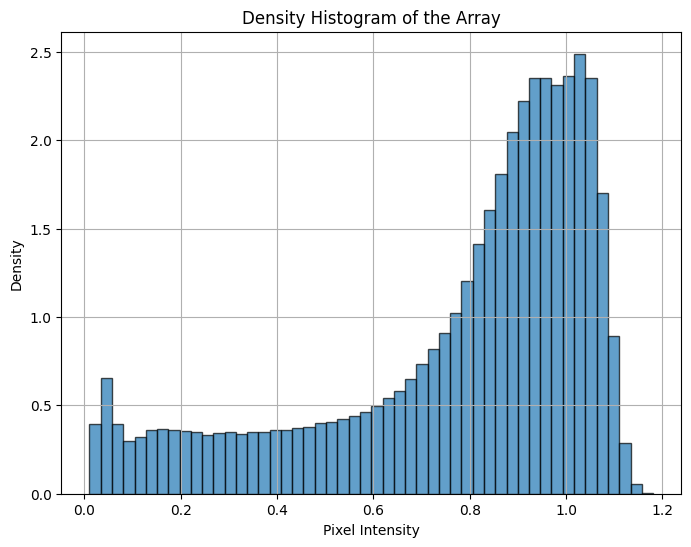

In [205]:
# global_domain[0].max()
flattened_array = global_domain[0,:,:,:].flatten()
import matplotlib.pyplot as plt
# Plot the density histogram
plt.figure(figsize=(8, 6))
plt.hist(flattened_array, bins=50, density=True, alpha=0.7, edgecolor='black')
plt.title('Density Histogram of the Array')
plt.xlabel('Pixel Intensity')
plt.ylabel('Density')
plt.grid(True)
plt.show()

In [206]:
np.stack([overlap_counts,overlap_counts,overlap_counts]).shape

(3, 128, 64, 128)

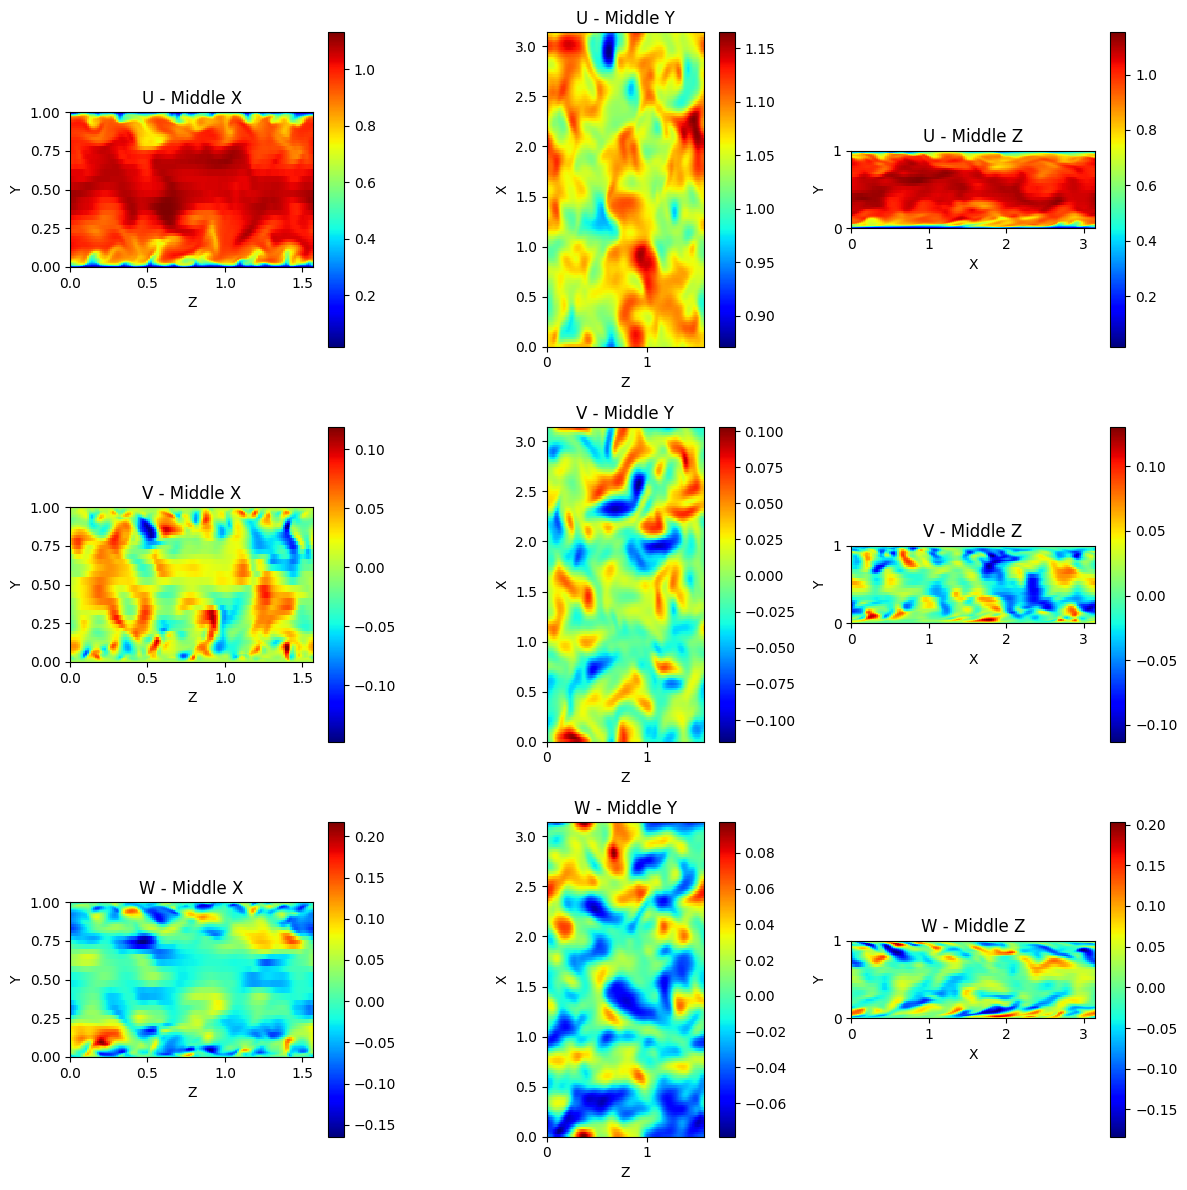

In [207]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming data and coordinates are already defined
data = global_domain
# data = np.stack([overlap_counts,overlap_counts,overlap_counts])
x_coords, y_coords, z_coords = coordinates

# Extracting middle planes
u = data[0]
v = data[1]
w = data[2]

shape = data.shape  # (3, 339, 170, 339)

middle_x = shape[1] // 2
middle_y = shape[2] // 2
middle_z = shape[3] // 2

u_x = u[middle_x, :, :]  # Shape (170, 339)
u_y = u[:, middle_y, :]  # Shape (339, 339)
u_z = u[:, :, middle_z]  # Shape (339, 170)

v_x = v[middle_x, :, :]
v_y = v[:, middle_y, :]
v_z = v[:, :, middle_z]

w_x = w[middle_x, :, :]
w_y = w[:, middle_y, :]
w_z = w[:, :, middle_z]

# Titles for the subplots
titles = [
    "U - Middle X", "U - Middle Y", "U - Middle Z",
    "V - Middle X", "V - Middle Y", "V - Middle Z",
    "W - Middle X", "W - Middle Y", "W - Middle Z"
]

data_slices = [
    u_x, u_y, u_z,
    v_x, v_y, v_z,
    w_x, w_y, w_z
]

# Compute the cell edges
def compute_edges(coords):
    edges = np.zeros(len(coords)+1)
    edges[1:-1] = 0.5 * (coords[:-1] + coords[1:])
    edges[0] = coords[0] - 0.5*(coords[1] - coords[0])
    edges[-1] = coords[-1] + 0.5*(coords[-1] - coords[-2])
    return edges

x_edges = compute_edges(x_coords)
y_edges = compute_edges(y_coords)
z_edges = compute_edges(z_coords)

# Plotting the 9 subplots with actual cell size scaling
fig, axes = plt.subplots(3, 3, figsize=(12, 12))

for i, ax in enumerate(axes.flat):
    data_slice = data_slices[i]
    plane = i % 3
    if plane == 0:  # Middle X plane, plotting y vs z
        Y_edges, Z_edges = y_edges, z_edges
        Y_grid, Z_grid = np.meshgrid(Y_edges, Z_edges, indexing='ij')
        im = ax.pcolormesh(Z_grid, Y_grid, data_slice, shading='auto', cmap='jet')
        ax.set_xlabel('Z')
        ax.set_ylabel('Y')
    elif plane == 1:  # Middle Y plane, plotting x vs z
        X_edges, Z_edges = x_edges, z_edges
        X_grid, Z_grid = np.meshgrid(X_edges, Z_edges, indexing='ij')
        im = ax.pcolormesh(Z_grid, X_grid, data_slice, shading='auto', cmap='jet')
        ax.set_xlabel('Z')
        ax.set_ylabel('X')
    else:  # plane == 2, Middle Z plane, plotting x vs y
        X_edges, Y_edges = x_edges, y_edges
        X_grid, Y_grid = np.meshgrid(X_edges, Y_edges, indexing='ij')
        im = ax.pcolormesh(X_grid, Y_grid, data_slice, shading='auto', cmap='jet')
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
    ax.set_title(titles[i])
    fig.colorbar(im, ax=ax, orientation='vertical')
    ax.set_aspect('equal')

plt.tight_layout()
plt.show()


In [41]:
data.shape

(3, 137, 69, 133)

In [163]:
import numpy as np

def compute_residuals(velocity, coords):
    """
    Compute the L1 residuals of the mass conservation and momentum equations.

    Parameters:
    velocity : numpy.ndarray
        4D array of shape (3, nx, ny, nz), where velocity[0] is u, velocity[1] is v, velocity[2] is w.
    coords : tuple of numpy.ndarray
        Tuple containing (x_coords, y_coords, z_coords), each of which is a 1D array of cell center coordinates.

    Returns:
    residuals : dict
        Dictionary containing L1 residuals for mass conservation ('mass') and momentum equations ('u', 'v', 'w').
    """
    u = velocity[0]  # shape (nx, ny, nz)
    v = velocity[1]
    w = velocity[2]
    x_coords, y_coords, z_coords = coords
    nx, ny, nz = u.shape

    # Initialize arrays for derivatives
    du_dx = np.zeros_like(u)
    dv_dy = np.zeros_like(v)
    dw_dz = np.zeros_like(w)

    # # Compute grid spacings
    # dx = np.diff(x_coords)
    # dy = np.diff(y_coords)
    # dz = np.diff(z_coords)

    # # Extend grid spacings to cell centers
    # dx = np.pad(dx, (1, 0), 'edge')
    # dy = np.pad(dy, (1, 0), 'edge')
    # dz = np.pad(dz, (1, 0), 'edge')

    # Compute derivatives using central differences for interior points
    for i in range(1, nx-1):
        du_dx[i,:,:] = (u[i+1,:,:] - u[i-1,:,:]) / (x_coords[i+1] - x_coords[i-1])
    for j in range(1, ny-1):
        dv_dy[:,j,:] = (v[:,j+1,:] - v[:,j-1,:]) / (y_coords[j+1] - y_coords[j-1])
    for k in range(1, nz-1):
        dw_dz[:,:,k] = (w[:,:,k+1] - w[:,:,k-1]) / (z_coords[k+1] - z_coords[k-1])

    # Handle boundaries with one-sided differences
    du_dx[0,:,:] = (u[1,:,:] - u[0,:,:]) / (x_coords[1] - x_coords[0])
    du_dx[-1,:,:] = (u[-1,:,:] - u[-2,:,:]) / (x_coords[-1] - x_coords[-2])

    dv_dy[:,0,:] = (v[:,1,:] - v[:,0,:]) / (y_coords[1] - y_coords[0])
    dv_dy[:,-1,:] = (v[:,-1,:] - v[:,-2,:]) / (y_coords[-1] - y_coords[-2])

    dw_dz[:,:,0] = (w[:,:,1] - w[:,:,0]) / (z_coords[1] - z_coords[0])
    dw_dz[:,:,-1] = (w[:,:,-1] - w[:,:,-2]) / (z_coords[-1] - z_coords[-2])

    # Compute divergence (mass conservation residual)
    divergence = du_dx + dv_dy + dw_dz
    mass_residual = np.abs(divergence)

    # Compute momentum residuals (net flux imbalances)
    # For demonstration, we'll compute the advection term residuals
    # In practice, you would include pressure and viscosity terms if available

    # Initialize arrays for momentum residuals
    residual_u = np.zeros_like(u)
    residual_v = np.zeros_like(v)
    residual_w = np.zeros_like(w)

    # Compute flux differences for u-momentum
    for i in range(1, nx-1):
        residual_u[i,:,:] = (u[i+1,:,:]*u[i+1,:,:] - u[i-1,:,:]*u[i-1,:,:]) / (x_coords[i+1] - x_coords[i-1])
    # Similar computations for residual_v and residual_w

    # For simplicity, we'll set momentum residuals to zero (as placeholders)
    residual_u = np.abs(du_dx)  # Placeholder
    residual_v = np.abs(dv_dy)  # Placeholder
    residual_w = np.abs(dw_dz)  # Placeholder

    residuals = {
        'mass': mass_residual,
        'u': residual_u,
        'v': residual_v,
        'w': residual_w
    }

    return residuals


residuals=compute_residuals(data, coordinates)

In [164]:
residuals["u"][:,40,:]

array([[0.4976 , 0.3982 , 0.2786 , ..., 0.4778 , 0.557  , 0.577  ],
       [0.5273 , 0.4478 , 0.3384 , ..., 0.418  , 0.5273 , 0.5674 ],
       [0.5674 , 0.5376 , 0.4478 , ..., 0.3584 , 0.5073 , 0.557  ],
       ...,
       [0.2488 , 0.3284 , 0.3982 , ..., 0.3384 , 0.09955, 0.0896 ],
       [0.0199 , 0.1493 , 0.2488 , ..., 0.5474 , 0.3882 , 0.1692 ],
       [0.11945, 0.0398 , 0.1592 , ..., 0.617  , 0.5176 , 0.2986 ]],
      dtype=float16)

In [177]:
import numpy as np

def compute_mass_flux_residuals(data,coordinates):
    x_coords,y_coords,z_coords = coordinates   


    u = data[0]  
    v = data[1]
    w = data[2]

    # 2. Compute cell face positions
    def compute_faces(coords):
        faces = np.zeros(len(coords) + 1)
        faces[1:-1] = 0.5 * (coords[:-1] + coords[1:])
        # Extrapolate boundary faces
        faces[0] = coords[0] - 0.5 * (coords[1] - coords[0])
        faces[-1] = coords[-1] + 0.5 * (coords[-1] - coords[-2])
        return faces

    x_faces = compute_faces(x_coords)
    y_faces = compute_faces(y_coords)
    z_faces = compute_faces(z_coords)

    # 3. Compute face distances
    dx = x_faces[1:] - x_faces[:-1]
    dy = y_faces[1:] - y_faces[:-1]
    dz = z_faces[1:] - z_faces[:-1]

    # 4. Compute face areas
    # Since the grid is rectilinear but non-uniform, areas depend on cell indices

    # Prepare arrays for broadcasting
    dx = dx[:, np.newaxis, np.newaxis]
    dy = dy[np.newaxis, :, np.newaxis]
    dz = dz[np.newaxis, np.newaxis, :]

    # Areas for faces perpendicular to x-direction (yz-plane)
    Area_yz = dy * dz

    # Areas for faces perpendicular to y-direction (xz-plane)
    Area_xz = dx * dz

    # Areas for faces perpendicular to z-direction (xy-plane)
    Area_xy = dx * dy

    # 5. Compute mass fluxes at faces

    # For u (x-direction flux)
    u_east = np.zeros_like(u)
    u_east[:-1, :, :] = 0.5 * (u[:-1, :, :] + u[1:, :, :])
    C_east = u_east * Area_yz  # Broadcasting over x-direction

    # For v (y-direction flux)
    v_north = np.zeros_like(v)
    v_north[:, :-1, :] = 0.5 * (v[:, :-1, :] + v[:, 1:, :])
    C_north = v_north * Area_xz  # Broadcasting over y-direction

    # For w (z-direction flux)
    w_top = np.zeros_like(w)
    w_top[:, :, :-1] = 0.5 * (w[:, :, :-1] + w[:, :, 1:])
    C_top = w_top * Area_xy  # Broadcasting over z-direction

    # 6. Compute flux differences

    # East-West flux differences
    Flux_diff_x = C_east - np.roll(C_east, shift=1, axis=0)
    Flux_diff_x[0, :, :] = C_east[0, :, :]  # Assuming zero flux before the first cell

    # North-South flux differences
    Flux_diff_y = C_north - np.roll(C_north, shift=1, axis=1)
    Flux_diff_y[:, 0, :] = C_north[:, 0, :]  # Assuming zero flux before the first cell

    # Top-Bottom flux differences
    Flux_diff_z = C_top - np.roll(C_top, shift=1, axis=2)
    Flux_diff_z[:, :, 0] = C_top[:, :, 0]  # Assuming zero flux before the first cell

    # 7. Compute net mass flux divergence
    Net_flux = Flux_diff_x + Flux_diff_y + Flux_diff_z
    Net_flux=Net_flux[1:-1,1:-1,1:-1]
    return Net_flux




Mass Conservation Residual: 1.3984201128861542e-07


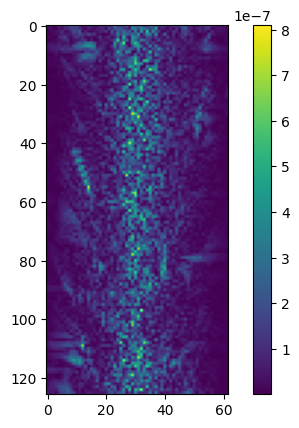

: 

In [ ]:
import matplotlib.pyplot as plt
block_nb=13
Net_flux=compute_mass_flux_residuals(data,coordinates)
# Net_flux=compute_mass_flux_residuals(data_blocks[block_nb][2:], grid_positions[block_nb])
Residual = np.sqrt(np.mean(Net_flux**2))
print("Mass Conservation Residual:", Residual)
Net_flux=np.abs(Net_flux)
plt.imshow(Net_flux[:,:,64])
plt.colorbar()
# np.unravel_index(Net_flux.argmax(), res_u.shape)

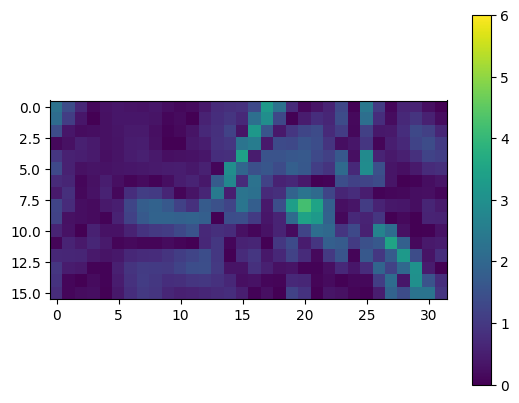

In [174]:
residuals=compute_residuals(data_blocks[2][2:], coordinates)
res_u:np.ndarray=residuals["u"]
plt.imshow(res_u[:,12,:], vmin=0, vmax=6)
plt.colorbar()

In [269]:
import numpy as np

def compute_L1_residuals(U, coords):
    """
    Computes the L1 norm residuals of u, v, w for each cell in a 3D grid.

    Parameters:
    U : numpy.ndarray
        A 4D array of shape (3, nx, ny, nz) containing the velocity components (u, v, w).
    coords : tuple of numpy.ndarray
        A tuple containing the x_coords (length nx), y_coords (length ny), z_coords (length nz),
        which are the cell center coordinates.

    Returns:
    numpy.ndarray
        A 4D array of residuals with the same shape as U, containing the L1 norm residuals
        for u, v, and w at each cell.
    """
    u = U[0]
    v = U[1]
    w = U[2]
    nx, ny, nz = u.shape

    x_coords, y_coords, z_coords = coords

    res_u = np.zeros_like(u)
    res_v = np.zeros_like(v)
    res_w = np.zeros_like(w)

    # Compute differences in coordinates
    dx = np.diff(x_coords)
    dy = np.diff(y_coords)
    dz = np.diff(z_coords)

    # For boundary cells, we assume zero gradient (Neumann boundary condition)
    for i in range(nx):
        for j in range(ny):
            for k in range(nz):
                res_u_cell = 0.0
                res_v_cell = 0.0
                res_w_cell = 0.0

                # Handle x-direction
                if i > 0:
                    delta_x = x_coords[i] - x_coords[i-1]
                    res_u_cell += abs(u[i,j,k] - u[i-1,j,k]) / delta_x
                    res_v_cell += abs(v[i,j,k] - v[i-1,j,k]) / delta_x
                    res_w_cell += abs(w[i,j,k] - w[i-1,j,k]) / delta_x
                if i < nx - 1:
                    delta_x = x_coords[i+1] - x_coords[i]
                    res_u_cell += abs(u[i+1,j,k] - u[i,j,k]) / delta_x
                    res_v_cell += abs(v[i+1,j,k] - v[i,j,k]) / delta_x
                    res_w_cell += abs(w[i+1,j,k] - w[i,j,k]) / delta_x

                # Handle y-direction
                if j > 0:
                    delta_y = y_coords[j] - y_coords[j-1]
                    res_u_cell += abs(u[i,j,k] - u[i,j-1,k]) / delta_y
                    res_v_cell += abs(v[i,j,k] - v[i,j-1,k]) / delta_y
                    res_w_cell += abs(w[i,j,k] - w[i,j-1,k]) / delta_y
                if j < ny - 1:
                    delta_y = y_coords[j+1] - y_coords[j]
                    res_u_cell += abs(u[i,j+1,k] - u[i,j,k]) / delta_y
                    res_v_cell += abs(v[i,j+1,k] - v[i,j,k]) / delta_y
                    res_w_cell += abs(w[i,j+1,k] - w[i,j,k]) / delta_y

                # Handle z-direction
                if k > 0:
                    delta_z = z_coords[k] - z_coords[k-1]
                    res_u_cell += abs(u[i,j,k] - u[i,j,k-1]) / delta_z
                    res_v_cell += abs(v[i,j,k] - v[i,j,k-1]) / delta_z
                    res_w_cell += abs(w[i,j,k] - w[i,j,k-1]) / delta_z
                if k < nz - 1:
                    delta_z = z_coords[k+1] - z_coords[k]
                    res_u_cell += abs(u[i,j,k+1] - u[i,j,k]) / delta_z
                    res_v_cell += abs(v[i,j,k+1] - v[i,j,k]) / delta_z
                    res_w_cell += abs(w[i,j,k+1] - w[i,j,k]) / delta_z

                res_u[i,j,k] = res_u_cell
                res_v[i,j,k] = res_v_cell
                res_w[i,j,k] = res_w_cell

    return np.array([res_u, res_v, res_w])
residuals = compute_L1_residuals(data[1:], coordinates)


(np.int64(37), np.int64(1), np.int64(122))

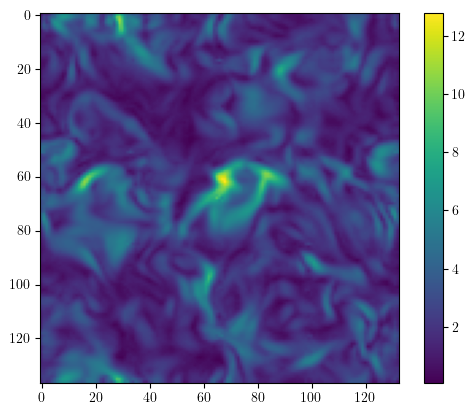

In [287]:
import matplotlib.pyplot as plt
import torch
res_u:np.ndarray=residuals[0]
# plt.imshow(res_u.mean(axis=1))
plt.imshow(res_u[:,30,:])
plt.colorbar()
np.unravel_index(res_u.argmax(), res_u.shape)

In [238]:
max_res={}
for i, data_block in enumerate(data_blocks, start=1):
    residuals=compute_residuals(data_block[2:], coordinates)
    res_u:np.ndarray=residuals["u"]
    print(i, res_u.max())
    print(np.unravel_index(res_u.argmax(), res_u.shape))
    print()
    max_res[i]=([i, res_u.max(),np.unravel_index(res_u.argmax(), res_u.shape)])

1 6.149374080152302
(np.int64(2), np.int64(10), np.int64(5))

2 7.67356162794858
(np.int64(5), np.int64(9), np.int64(20))

3 6.421915524745952
(np.int64(11), np.int64(8), np.int64(28))

4 4.056569234579833
(np.int64(17), np.int64(11), np.int64(10))

5 2.4488775012670225
(np.int64(0), np.int64(0), np.int64(11))

6 6.108421096063878
(np.int64(0), np.int64(0), np.int64(7))

7 4.504140102806138
(np.int64(17), np.int64(1), np.int64(32))

8 4.572397051463553
(np.int64(0), np.int64(0), np.int64(16))

9 2.9842090112624233
(np.int64(0), np.int64(17), np.int64(3))

10 4.692394491425914
(np.int64(0), np.int64(17), np.int64(32))

11 5.867338490328751
(np.int64(9), np.int64(16), np.int64(32))

12 5.679948679537521
(np.int64(9), np.int64(16), np.int64(0))

13 6.554721800741616
(np.int64(12), np.int64(5), np.int64(32))

14 6.614576735650538
(np.int64(10), np.int64(7), np.int64(2))

15 6.800470505777226
(np.int64(14), np.int64(10), np.int64(7))

16 5.927902261423538
(np.int64(0), np.int64(6), np.int64

In [240]:
max_res[119]

[119, np.float64(6.198700183384438), (np.int64(0), np.int64(0), np.int64(27))]

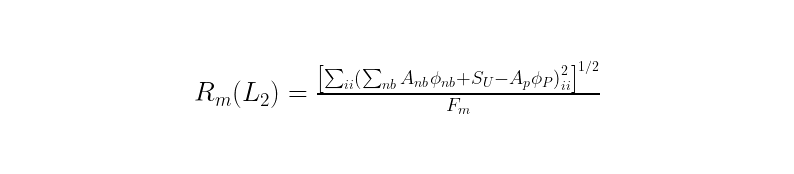

In [286]:
import matplotlib.pyplot as plt
import matplotlib

# Configure LaTeX rendering in Matplotlib
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

# Render the equation
equation = r"$R_m(L_2) = \frac{\left[\sum_{ii} \left(\sum_{nb} A_{nb} \phi_{nb} + S_U - A_p \phi_P \right)_{ii}^2 \right]^{1/2}}{F_m}$"

# Create a plot to display the equation
fig, ax = plt.subplots(figsize=(10, 2))
ax.text(0.5, 0.5, equation, fontsize=20, ha='center', va='center')
ax.axis('off')

# Show the rendered equation
plt.show()


In [236]:
from io import StringIO
import re

import pandas as pd
with open(r"C:\Users\qcl656\OneDrive - AFRY\Documents\PROJECTS\Total_G-LED\data\NS_mesh3_full_simulation\RESULT\L1_resnorm.dat", 'r') as file:
    data_str = file.read()
lines = data_str.strip().split('\n')
# Extract the header lines and data lines
header_lines = []
data_lines = []
header_started = False
for line in lines:
    if '###' in line:
        header_started = not header_started
        continue
    if header_started:
        header_lines.append(line.strip())
    else:
        if line.strip():
            data_lines.append(line.strip())

# Parse the header lines to get column names
column_names = []
for line in header_lines:
    match = re.match(r"#\s*(\d+):\s*(.*?)\s*#", line)
    if match:
        col_num = int(match.group(1))
        col_name = match.group(2)
        column_names.append((col_num, col_name))

# Sort the column names by column number
column_names.sort(key=lambda x: x[0])

# Extract the column descriptions in order
column_descriptions = [desc for num, desc in column_names]

# Now read the data into a DataFrame
data_str_io = StringIO('\n'.join(data_lines))
df = pd.read_csv(data_str_io, delim_whitespace=True, header=None, names=column_descriptions)

# Display the DataFrame
df.loc[:, df.columns.str.contains("block number", case=False)]

C:\Users\qcl656\AppData\Local\Temp\ipykernel_36420\1541644431.py:39: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(data_str_io, delim_whitespace=True, header=None, names=column_descriptions)


,"Pres-Divmax. residue (begin), global block number","Pres-Divmax. residue ( end), global block number","U-Velocitymax. residue (begin), global block number","U-Velocitymax. residue ( end), global block number","V-Velocitymax. residue (begin), global block number","V-Velocitymax. residue ( end), global block number","W-Velocitymax. residue (begin), global block number","W-Velocitymax. residue ( end), global block number"
0,44,44,119,119,91,121,73,73
1,44,44,119,119,91,121,73,73
2,44,44,119,119,91,121,73,117
3,44,44,119,119,91,121,73,117
4,44,44,44,54,91,121,73,5
...,...,...,...,...,...,...,...,...
212,46,46,23,23,7,7,24,24
213,46,46,23,23,7,7,24,24
214,46,46,23,23,7,7,24,24
215,46,46,23,23,7,7,24,24


In [177]:
import numpy as np

def compute_residuals(velocity, coords, pressure, viscosity):
    """
    Compute the L1 residuals of the mass conservation and momentum equations.

    Parameters:
    velocity : numpy.ndarray
        4D array of shape (3, nx, ny, nz), where velocity[0] is u, velocity[1] is v, velocity[2] is w.
    coords : tuple of numpy.ndarray
        Tuple containing (x_coords, y_coords, z_coords), each of which is a 1D array of cell center coordinates.
    pressure : numpy.ndarray
        3D array of shape (nx, ny, nz), pressure field.
    viscosity : float
        Constant viscosity value.

    Returns:
    residuals : dict
        Dictionary containing L1 residuals for mass conservation ('mass') and momentum equations ('u', 'v', 'w').
    """
    u = velocity[0]  # shape (nx, ny, nz)
    v = velocity[1]
    w = velocity[2]
    x_coords, y_coords, z_coords = coords

    # Initialize arrays for derivatives
    du_dx = np.zeros_like(u)
    dv_dy = np.zeros_like(v)
    dw_dz = np.zeros_like(w)
    dp_dx = np.zeros_like(pressure)
    dp_dy = np.zeros_like(pressure)
    dp_dz = np.zeros_like(pressure)
    laplacian_u = np.zeros_like(u)
    laplacian_v = np.zeros_like(v)
    laplacian_w = np.zeros_like(w)

    # Compute grid spacings
    dx = np.diff(x_coords)
    dy = np.diff(y_coords)
    dz = np.diff(z_coords)

    # Extend grid spacings to match array dimensions
    dx = np.pad(dx, (1, 0), 'edge')
    dy = np.pad(dy, (1, 0), 'edge')
    dz = np.pad(dz, (1, 0), 'edge')

    dx = dx.reshape(-1, 1, 1)
    dy = dy.reshape(1, -1, 1)
    dz = dz.reshape(1, 1, -1)

    # Compute derivatives using central differences for interior points
    # Mass conservation residuals
    du_dx[1:-1,:,:] = (u[2:,:,:] - u[:-2,:,:]) / (x_coords[2:] - x_coords[:-2])[:, None, None]
    dv_dy[:,1:-1,:] = (v[:,2:,:] - v[:,:-2,:]) / (y_coords[2:] - y_coords[:-2])[None, :, None]
    dw_dz[:,:,1:-1] = (w[:,:,2:] - w[:,:,:-2]) / (z_coords[2:] - z_coords[:-2])[None, None, :]

    # One-sided differences at boundaries
    du_dx[0,:,:] = (u[1,:,:] - u[0,:,:]) / (x_coords[1] - x_coords[0])
    du_dx[-1,:,:] = (u[-1,:,:] - u[-2,:,:]) / (x_coords[-1] - x_coords[-2])

    dv_dy[:,0,:] = (v[:,1,:] - v[:,0,:]) / (y_coords[1] - y_coords[0])
    dv_dy[:,-1,:] = (v[:,-1,:] - v[:,-2,:]) / (y_coords[-1] - y_coords[-2])

    dw_dz[:,:,0] = (w[:,:,1] - w[:,:,0]) / (z_coords[1] - z_coords[0])
    dw_dz[:,:,-1] = (w[:,:,-1] - w[:,:,-2]) / (z_coords[-1] - z_coords[-2])

    # Compute divergence (mass conservation residual)
    divergence = du_dx + dv_dy + dw_dz
    mass_residual = np.abs(divergence)

    # Momentum equations residuals
    # Advection terms
    adv_u = np.zeros_like(u)
    adv_v = np.zeros_like(v)
    adv_w = np.zeros_like(w)

    # Compute advection terms using central differences
    # For u-component
    u_du_dx = np.zeros_like(u)
    v_du_dy = np.zeros_like(u)
    w_du_dz = np.zeros_like(u)

    u_du_dx[1:-1,:,:] = u[1:-1,:,:] * (u[2:,:,:] - u[:-2,:,:]) / (x_coords[2:] - x_coords[:-2])[:, None, None]
    v_du_dy[:,1:-1,:] = v[:,1:-1,:] * (u[:,2:,:] - u[:,:-2,:]) / (y_coords[2:] - y_coords[:-2])[None, :, None]
    w_du_dz[:,:,1:-1] = w[:,:,1:-1] * (u[:,:,2:] - u[:,:,:-2]) / (z_coords[2:] - z_coords[:-2])[None, None, :]

    adv_u = u_du_dx + v_du_dy + w_du_dz

    # Similarly for v-component
    u_dv_dx = np.zeros_like(v)
    v_dv_dy = np.zeros_like(v)
    w_dv_dz = np.zeros_like(v)

    u_dv_dx[1:-1,:,:] = u[1:-1,:,:] * (v[2:,:,:] - v[:-2,:,:]) / (x_coords[2:] - x_coords[:-2])[:, None, None]
    v_dv_dy[:,1:-1,:] = v[:,1:-1,:] * (v[:,2:,:] - v[:,:-2,:]) / (y_coords[2:] - y_coords[:-2])[None, :, None]
    w_dv_dz[:,:,1:-1] = w[:,:,1:-1] * (v[:,:,2:] - v[:,:,:-2]) / (z_coords[2:] - z_coords[:-2])[None, None, :]

    adv_v = u_dv_dx + v_dv_dy + w_dv_dz

    # Similarly for w-component
    u_dw_dx = np.zeros_like(w)
    v_dw_dy = np.zeros_like(w)
    w_dw_dz = np.zeros_like(w)

    u_dw_dx[1:-1,:,:] = u[1:-1,:,:] * (w[2:,:,:] - w[:-2,:,:]) / (x_coords[2:] - x_coords[:-2])[:, None, None]
    v_dw_dy[:,1:-1,:] = v[:,1:-1,:] * (w[:,2:,:] - w[:,:-2,:]) / (y_coords[2:] - y_coords[:-2])[None, :, None]
    w_dw_dz[:,:,1:-1] = w[:,:,1:-1] * (w[:,:,2:] - w[:,:,:-2]) / (z_coords[2:] - z_coords[:-2])[None, None, :]

    adv_w = u_dw_dx + v_dw_dy + w_dw_dz

    # Pressure gradient terms
    dp_dx[1:-1,:,:] = (pressure[2:,:,:] - pressure[:-2,:,:]) / (x_coords[2:] - x_coords[:-2])[:, None, None]
    dp_dy[:,1:-1,:] = (pressure[:,2:,:] - pressure[:,:-2,:]) / (y_coords[2:] - y_coords[:-2])[None, :, None]
    dp_dz[:,:,1:-1] = (pressure[:,:,2:] - pressure[:,:,:-2]) / (z_coords[2:] - z_coords[:-2])[None, None, :]

    # Viscous terms (Laplacian of velocity components)
    # For u-component
    d2u_dx2 = np.zeros_like(u)
    d2u_dy2 = np.zeros_like(u)
    d2u_dz2 = np.zeros_like(u)

    d2u_dx2[1:-1,:,:] = (u[2:,:,:] - 2*u[1:-1,:,:] + u[:-2,:,:]) / ((x_coords[2:] - x_coords[:-2])[:, None, None]/2)**2
    d2u_dy2[:,1:-1,:] = (u[:,2:,:] - 2*u[:,1:-1,:] + u[:,:-2,:]) / ((y_coords[2:] - y_coords[:-2])[None, :, None]/2)**2
    d2u_dz2[:,:,1:-1] = (u[:,:,2:] - 2*u[:,:,1:-1] + u[:,:,:-2]) / ((z_coords[2:] - z_coords[:-2])[None, None, :]/2)**2

    laplacian_u = d2u_dx2 + d2u_dy2 + d2u_dz2

    # Similarly for v-component
    d2v_dx2 = np.zeros_like(v)
    d2v_dy2 = np.zeros_like(v)
    d2v_dz2 = np.zeros_like(v)

    d2v_dx2[1:-1,:,:] = (v[2:,:,:] - 2*v[1:-1,:,:] + v[:-2,:,:]) / ((x_coords[2:] - x_coords[:-2])[:, None, None]/2)**2
    d2v_dy2[:,1:-1,:] = (v[:,2:,:] - 2*v[:,1:-1,:] + v[:,:-2,:]) / ((y_coords[2:] - y_coords[:-2])[None, :, None]/2)**2
    d2v_dz2[:,:,1:-1] = (v[:,:,2:] - 2*v[:,:,1:-1] + v[:,:,:-2]) / ((z_coords[2:] - z_coords[:-2])[None, None, :]/2)**2

    laplacian_v = d2v_dx2 + d2v_dy2 + d2v_dz2

    # Similarly for w-component
    d2w_dx2 = np.zeros_like(w)
    d2w_dy2 = np.zeros_like(w)
    d2w_dz2 = np.zeros_like(w)

    d2w_dx2[1:-1,:,:] = (w[2:,:,:] - 2*w[1:-1,:,:] + w[:-2,:,:]) / ((x_coords[2:] - x_coords[:-2])[:, None, None]/2)**2
    d2w_dy2[:,1:-1,:] = (w[:,2:,:] - 2*w[:,1:-1,:] + w[:,:-2,:]) / ((y_coords[2:] - y_coords[:-2])[None, :, None]/2)**2
    d2w_dz2[:,:,1:-1] = (w[:,:,2:] - 2*w[:,:,1:-1] + w[:,:,:-2]) / ((z_coords[2:] - z_coords[:-2])[None, None, :]/2)**2

    laplacian_w = d2w_dx2 + d2w_dy2 + d2w_dz2

    # Compute residuals of the momentum equations
    residual_u = adv_u - dp_dx + viscosity * laplacian_u
    residual_v = adv_v - dp_dy + viscosity * laplacian_v
    residual_w = adv_w - dp_dz + viscosity * laplacian_w

    # Compute absolute residuals
    residual_u = np.abs(residual_u)
    residual_v = np.abs(residual_v)
    residual_w = np.abs(residual_w)

    residuals = {
        'mass': mass_residual,
        'u': residual_u,
        'v': residual_v,
        'w': residual_w
    }

    return residuals
residuals=compute_residuals(global_domain[1:], coordinates, global_domain[0], 8.9e-4)

In [179]:
mass_residuals = residuals['mass']
u_residuals = residuals['u']
v_residuals = residuals['v']
w_residuals = residuals['w']

# You can now compute the L1 norms if needed
mass_L1_norm = np.mean(mass_residuals)
u_L1_norm = np.mean(u_residuals)
v_L1_norm = np.mean(v_residuals)
w_L1_norm = np.mean(w_residuals)

print(mass_L1_norm)
print(u_L1_norm)
print(v_L1_norm)
print(w_L1_norm)

0.04526
40.47
45.28
63.3


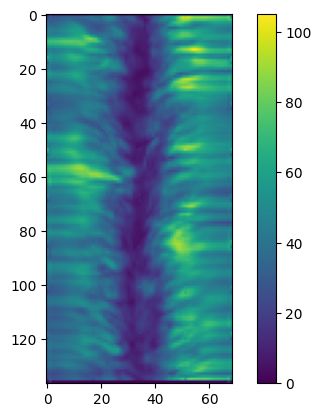

In [180]:
import matplotlib.pyplot as plt
res_u:np.ndarray=residuals["u"]
plt.imshow(res_u.mean(axis=2))
plt.colorbar()

In [95]:
np.savez('coordinates_NN_mesh3.npz', array1=coordinates[0], array2=coordinates[1], array3=coordinates[2])


# Combine npy timestep

In [1]:
import numpy as np
import os

folder_path = "../data/NS_mesh3_full_simulation/numpy/"
npy_files = [
    os.path.join(folder_path, f) for f in os.listdir(folder_path) if (f.endswith("5.npy") or f.endswith("0.npy"))
]
npy_files=sorted(npy_files, key=lambda x: int(x.split('float16_')[1].split('.')[0]))
len(npy_files)

17220

In [2]:
idx=[]
for file in npy_files:
    idx.append(int(file.split('float16_')[1].split('.')[0]))
print((max(idx)-min(idx))/(len(idx)-1))
np.diff(idx).min(), np.diff(idx).max()


5.0


(np.int64(5), np.int64(5))

In [3]:
from tqdm import tqdm
arrays = []
for file in tqdm(npy_files[12700:]):
    array = np.load(file)
    if array.shape!=(3,128,64,128):
        print(file)
        print(array.shape)
    arrays.append(array)

concatenated_array = np.stack(arrays, axis=0)  # Concatenate along the first axis
np.save("../data/NS_mesh3_full_simulation/global_domain_float16_all_4.npy", concatenated_array)


  0%|          | 0/4520 [00:00<?, ?it/s]

100%|██████████| 4520/4520 [01:35<00:00, 47.28it/s]


In [1]:
import numpy as np
concatenated_array=np.load("../data/NS_mesh3_full_simulation/global_domain_float16_all_4.npy")
n_part = 5
split_len = concatenated_array.shape[0] // n_part + 1
for i in range(n_part):
    np.save(
        f"../data/NS_mesh3_full_simulation/global_domain_float16_4_part{i}.npy",
        concatenated_array[i * split_len : (i + 1) * split_len],
    )

In [5]:
for array in arrays:
    if array.shape!=(3,128,64,128):
        print(array.shape)

(3, 32, 64, 128)
(3, 16, 48, 128)
(3, 16, 16, 96)
(3, 96, 64, 128)
(3, 80, 64, 128)


In [4]:
concatenated_array.dtype

dtype('float16')

# load final data

In [1]:
import numpy as np
data=np.load("/shared/data1/Users/l1148900/G-LED/data/stacked_9.npy")

In [2]:
data.shape

(763, 3, 128, 64, 128)

In [12]:
data_slice=data[:,:,:,:33]

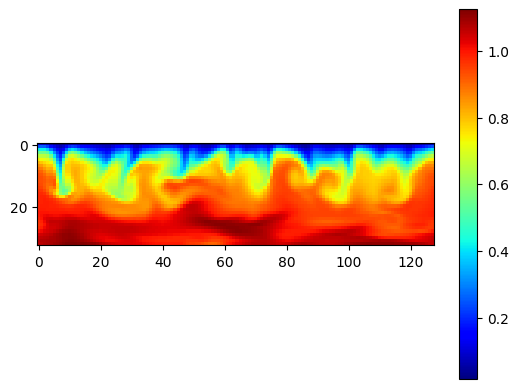

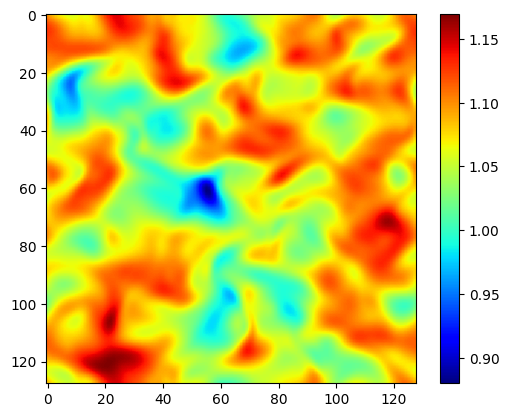

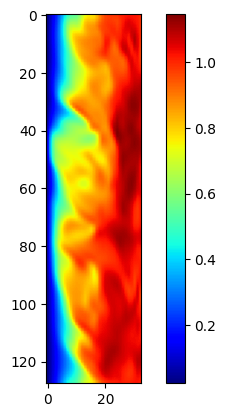

In [13]:
import matplotlib.pyplot as plt
plt.imshow(data_slice[0, 0, 64, :, :], cmap='jet')
plt.colorbar()
plt.show()
plt.imshow(data_slice[0, 0, :, 32, :], cmap='jet')
plt.colorbar()
plt.show()
plt.imshow(data_slice[0, 0, :, :, 64], cmap='jet')
plt.colorbar()
plt.show()

# Create test 3d data

100%|██████████| 100/100 [00:00<00:00, 20911.92it/s]


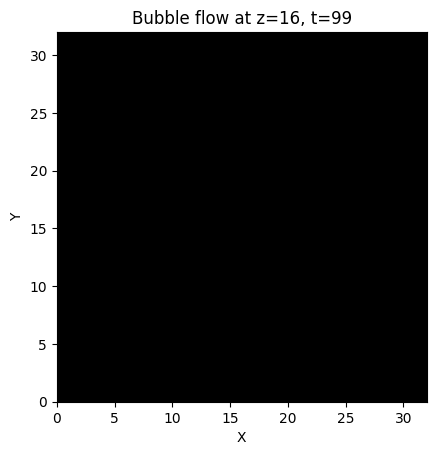

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from tqdm import tqdm
# Parameters
T = 100  # timesteps
X, Y, Z = 32, 32, 32
num_bubbles = 20  # number of bubbles

# Maximum angle in degrees for deviations
max_angle_deg = 15
max_angle_rad = np.radians(max_angle_deg)

# Initialize bubble positions randomly in the domain
# Positions stored as floats to allow fractional movement
bubble_positions = np.zeros((num_bubbles, 3))
bubble_positions[:,0] = np.random.uniform(0, X, size=num_bubbles)
bubble_positions[:,1] = np.random.uniform(0, Y, size=num_bubbles)
bubble_positions[:,2] = np.random.uniform(0, Z, size=num_bubbles)

# Assign random velocity directions
# Main velocity is along +x. We add small angular deviations.
# Start with vx = 1 cell per timestep.
vx = 1.0

# For vy and vz, we choose a random angle within ±max_angle_deg.
# The angle to the x-axis in yz-plane can be approximated by small tan(θ).
# Let's pick vy and vz from a normal distribution truncated to achieve the angle constraint.
vy_list = np.zeros(num_bubbles)
vz_list = np.zeros(num_bubbles)

for i in range(num_bubbles):
    # Random angles in yz-plane
    # We'll pick a random direction vector and scale so that the angle ≤ 15°
    # Another approach: pick random small vy, vz and ensure angle constraint.
    # The angle is given by atan(sqrt(vy^2+vz^2)/vx)
    # We want: sqrt(vy^2+vz^2)/vx <= tan(max_angle)
    # Let's pick vy and vz from a uniform distribution and then rescale.
    angle_ok = False
    while not angle_ok:
        vy_try = np.random.uniform(-0.5, 0.5)
        vz_try = np.random.uniform(-0.5, 0.5)
        angle = np.arctan(np.sqrt(vy_try**2 + vz_try**2) / vx)
        if angle <= max_angle_rad:
            angle_ok = True
            vy_list[i] = vy_try
            vz_list[i] = vz_try

# velocities
velocities = np.stack([np.full(num_bubbles, vx), vy_list, vz_list], axis=1)

# Now simulate over T timesteps
# We'll create frames for the video by extracting the slice at z=16 (middle)
mid_z = Z // 2

frames = []  # store arrays for visualization
for t in tqdm(range(T)):
    # Move the bubbles
    bubble_positions += velocities
    
    # Apply periodic boundary in x
    bubble_positions[:,0] %= X
    
    # If you want periodic in y and z as well, uncomment these:
    bubble_positions[:,1] %= Y
    bubble_positions[:,2] %= Z
    # Otherwise, clamp them (or reflect them) if desired:
    # bubble_positions[:,1] = np.clip(bubble_positions[:,1], 0, Y-1)
    # bubble_positions[:,2] = np.clip(bubble_positions[:,2], 0, Z-1)
    
    # Extract the slice at z = mid_z
    # We find which bubbles lie within a certain plane. Since positions are floats,
    # pick those with int(z) == mid_z or close to mid_z.
    # If you want a perfect slice, consider bubbles that fall exactly at z=16.
    # In practice, since bubbles move continuously, you could look at floor/round.
    # We'll consider a bubble "in the slice" if int(z)==mid_z.
    in_slice = (np.round(bubble_positions[:,2]) == mid_z)
    xy_positions = bubble_positions[in_slice, :2]
    
    # Create a frame for visualization
    # We'll create a 2D map: 0 where no bubble, 1 where bubble
    frame = np.zeros((X, Y))
    for x_b, y_b in xy_positions:
        xi = int(round(x_b)) % X
        yi = int(round(y_b)) % Y
        frame[xi, yi] = 1
    frames.append(frame)

# Now create a video/animation of the middle slice over time
fig, ax = plt.subplots()
im = ax.imshow(frames[0].T, cmap='gray', origin='lower', extent=(0,X,0,Y))
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_title("Bubble flow at z=16")

def update_frame(i):
    im.set_data(frames[i].T)
    ax.set_title(f"Bubble flow at z=16, t={i}")
    return [im]

ani = animation.FuncAnimation(fig, update_frame, frames=range(T), interval=50, blit=True)

# Save the animation as a video file (requires ffmpeg installed)
ani.save('bubble_flow.mp4', fps=20)

plt.show()


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Parameters
timesteps = 100
grid_size = 32
bubble_radius = 6
num_bubbles = 10
angle_variance = np.deg2rad(15)  # 15 degrees in radians
domain_size = (grid_size, grid_size, grid_size)

# Initialize bubble positions and directions
bubble_positions = np.random.uniform(0, grid_size, (num_bubbles, 3))
bubble_directions = np.array(
    [
        [
            1,
            np.tan(np.random.uniform(-angle_variance, angle_variance)),
            np.tan(np.random.uniform(-angle_variance, angle_variance)),
        ]
        for _ in range(num_bubbles)
    ]
)
bubble_directions = bubble_directions / np.linalg.norm(
    bubble_directions, axis=1, keepdims=True
)

# Initialize 3D flow
flow = np.zeros((timesteps, grid_size, grid_size, grid_size))

# Simulate the flow
for t in range(timesteps):
    # Clear grid
    grid = np.zeros(domain_size)

    # Update bubble positions and enforce periodic boundary conditions
    bubble_positions += bubble_directions
    bubble_positions %= grid_size

    # Draw bubbles in the grid
    for pos in bubble_positions:
        x, y, z = np.round(pos).astype(int)
        for dx in range(-bubble_radius, bubble_radius + 1):
            for dy in range(-bubble_radius, bubble_radius + 1):
                for dz in range(-bubble_radius, bubble_radius + 1):
                    if dx**2 + dy**2 + dz**2 <= bubble_radius**2:
                        nx, ny, nz = (
                            (x + dx) % grid_size,
                            (y + dy) % grid_size,
                            (z + dz) % grid_size,
                        )
                        grid[nx, ny, nz] = 1

    # Save grid to flow
    flow[t] = grid

# Create a video in the middle of the xy plane
fig, ax = plt.subplots(figsize=(6, 6))
im = ax.imshow(flow[0, :, :, grid_size // 2], cmap="viridis", interpolation="nearest")
ax.set_title("3D Flow - Middle XY Plane")


def update(t):
    im.set_array(flow[t, :, :, grid_size // 2])
    ax.set_title(f"Timestep: {t}")
    return [im]


ani = FuncAnimation(fig, update, frames=timesteps, interval=100, blit=True)
video_path = "3d_flow_simulation.mp4"
ani.save(video_path, writer="ffmpeg", fps=10)
plt.close(fig)

video_path

'3d_flow_simulation.mp4'

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Parameters
timesteps = 100
grid_size = 128
bubble_radius = 12
num_bubbles = 6
angle_variance = np.deg2rad([-45, -20, 20, 45])  # 15 degrees in radians

# Initialize bubble positions and directions
bubble_positions = np.random.uniform(0, grid_size, (num_bubbles, 2))
bubble_directions = np.array(
    [
        [
            1,
            np.tan(np.random.choice(angle_variance)),
        ]
        for _ in range(num_bubbles)
    ]
)
bubble_directions = bubble_directions / np.linalg.norm(
    bubble_directions, axis=1, keepdims=True
)

# Initialize 2D flow
flow = np.zeros((timesteps, grid_size, grid_size))

# Simulate the flow
for t in range(timesteps):
    # Clear grid
    grid = np.zeros((grid_size, grid_size))

    # Update bubble positions and enforce periodic boundary conditions
    bubble_positions += bubble_directions
    bubble_positions %= grid_size

    # Draw bubbles in the grid
    for pos in bubble_positions:
        x, y = np.round(pos).astype(int)
        for dx in range(-bubble_radius, bubble_radius + 1):
            for dy in range(-bubble_radius, bubble_radius + 1):
                if dx**2 + dy**2 <= bubble_radius**2:
                    nx, ny = (x + dx) % grid_size, (y + dy) % grid_size
                    grid[nx, ny] = 1

    # Save grid to flow
    flow[t] = grid

# Create a video of the 2D flow
fig, ax = plt.subplots(figsize=(6, 6))
im = ax.imshow(flow[0], cmap="viridis", interpolation="nearest")
ax.set_title("2D Flow Simulation")


def update(t):
    im.set_array(flow[t])
    ax.set_title(f"Timestep: {t}")
    return [im]


ani = FuncAnimation(fig, update, frames=timesteps, interval=100, blit=True)
video_path = "2d_flow_simulation.mp4"
ani.save(video_path, writer="ffmpeg", fps=10)
plt.close(fig)

video_path

'2d_flow_simulation.mp4'

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from scipy.ndimage import gaussian_filter

# Parameters
timesteps = 100
grid_size = 128
bubble_radius = 12
num_bubbles = 6
angle_variance = np.deg2rad([-45, -40, -35, -30, -25, -20, 20, 25, 30, 35, 40, 45])
blur_sigma = 0  # Standard deviation for Gaussian blur

# Initialize bubble positions and directions
bubble_positions = np.random.uniform(0, grid_size, (num_bubbles, 2))
bubble_directions = np.array(
    [
        [
            1,
            np.tan(np.random.choice(angle_variance)),
        ]
        for _ in range(num_bubbles)
    ]
)
bubble_directions = bubble_directions / np.linalg.norm(
    bubble_directions, axis=1, keepdims=True
)

# Initialize random velocities for each bubble
bubble_velocities = np.random.uniform(1, 3, (num_bubbles, 1))
bubble_directions *= bubble_velocities  # Scale directions by velocity

# Initialize 2D flow
flow = np.zeros((timesteps, grid_size, grid_size))

# Simulate the flow
for t in range(timesteps):
    # Clear grid
    grid = np.zeros((grid_size, grid_size))

    # Update bubble positions and enforce periodic boundary conditions
    bubble_positions += bubble_directions
    bubble_positions %= grid_size

    # Draw bubbles in the grid
    for pos in bubble_positions:
        x, y = np.round(pos).astype(int)
        for dx in range(-bubble_radius, bubble_radius + 1):
            for dy in range(-bubble_radius, bubble_radius + 1):
                if dx**2 + dy**2 <= bubble_radius**2:
                    nx, ny = (x + dx) % grid_size, (y + dy) % grid_size
                    grid[nx, ny] = 1

    # Apply Gaussian blur
    grid = gaussian_filter(grid, sigma=blur_sigma)

    # Save grid to flow
    flow[t] = grid

# Create a video of the 2D flow
fig, ax = plt.subplots(figsize=(6, 6))
im = ax.imshow(flow[0], cmap="viridis", interpolation="nearest")
ax.set_title("2D Flow Simulation with Gaussian Blur")


def update(t):
    im.set_array(flow[t])
    ax.set_title(f"Timestep: {t}")
    return [im]


ani = FuncAnimation(fig, update, frames=timesteps, interval=100, blit=True)
video_path = "2d_flow_simulation_with_blur.mp4"
ani.save(video_path, writer="ffmpeg", fps=10)
plt.close(fig)

print(f"Video saved at: {video_path}")

Video saved at: 2d_flow_simulation_with_blur.mp4


In [8]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from scipy.ndimage import gaussian_filter

# Parameters
timesteps = 100
grid_size = 128
min_radius = 8
max_radius = 20
num_bubbles = 6
angle_variance = np.deg2rad([-45, -40, -35, -30, -25, -20, 20, 25, 30, 35, 40, 45])
blur_sigma = 0  # Standard deviation for Gaussian blur

# Initialize bubble positions, directions, velocities, and sizes
bubble_positions = np.random.uniform(0, grid_size, (num_bubbles, 2))
bubble_directions = np.array(
    [
        [
            1,
            np.tan(np.random.choice(angle_variance)),
        ]
        for _ in range(num_bubbles)
    ]
)
bubble_directions = bubble_directions / np.linalg.norm(
    bubble_directions, axis=1, keepdims=True
)

# Initialize random velocities for each bubble
bubble_velocities = np.random.uniform(1, 3, (num_bubbles, 1))
bubble_directions *= bubble_velocities  # Scale directions by velocity

# Initialize sizes and growth rates
bubble_sizes = np.random.uniform(min_radius, max_radius, num_bubbles)
bubble_growth_rates = np.random.uniform(0.3, 1.5, num_bubbles)
bubble_growth_directions = np.random.choice([-1, 1], num_bubbles)

# Initialize 2D flow
flow = np.zeros((timesteps, grid_size, grid_size))

# Simulate the flow
for t in range(timesteps):
    # Clear grid
    grid = np.zeros((grid_size, grid_size))

    # Update bubble positions and enforce periodic boundary conditions
    bubble_positions += bubble_directions
    bubble_positions %= grid_size

    # Update bubble sizes
    for i in range(num_bubbles):
        bubble_sizes[i] += bubble_growth_directions[i] * bubble_growth_rates[i]
        if bubble_sizes[i] >= max_radius or bubble_sizes[i] <= min_radius:
            bubble_growth_directions[i] *= -1  # Reverse growth direction

    # Draw bubbles in the grid
    for i, pos in enumerate(bubble_positions):
        x, y = np.round(pos).astype(int)
        radius = int(bubble_sizes[i])
        for dx in range(-radius, radius + 1):
            for dy in range(-radius, radius + 1):
                if dx**2 + dy**2 <= radius**2:
                    nx, ny = (x + dx) % grid_size, (y + dy) % grid_size
                    grid[nx, ny] = 1

    # Apply Gaussian blur
    grid = gaussian_filter(grid, sigma=blur_sigma)

    # Save grid to flow
    flow[t] = grid

# Create a video of the 2D flow
fig, ax = plt.subplots(figsize=(6, 6))
im = ax.imshow(flow[0], cmap="viridis", interpolation="nearest")
ax.set_title("2D Flow Simulation with Gaussian Blur and Dynamic Bubble Sizes")


def update(t):
    im.set_array(flow[t])
    ax.set_title(f"Timestep: {t}")
    return [im]


ani = FuncAnimation(fig, update, frames=timesteps, interval=100, blit=True)
video_path = "2d_flow_simulation_dynamic_bubbles.mp4"
ani.save(video_path, writer="ffmpeg", fps=10)
plt.close(fig)

print(f"Video saved at: {video_path}")

Video saved at: 2d_flow_simulation_dynamic_bubbles.mp4


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from scipy.ndimage import gaussian_filter

# Parameters
timesteps = 100
grid_size = 64  # Smaller size for better performance in 3D
num_bubbles = 12
min_radius, max_radius = 4,9  # Minimum and maximum bubble radii
blur_sigma = 1  # Standard deviation for Gaussian blur

# Initialize bubble positions and directions in 3D
bubble_positions = np.random.uniform(0, grid_size, (num_bubbles, 3))
bubble_directions = np.random.normal(0, 1, (num_bubbles, 3))
bubble_directions = bubble_directions / np.linalg.norm(
    bubble_directions, axis=1, keepdims=True
)

# Initialize random velocities for each bubble
bubble_velocities = np.random.uniform(1, 2, (num_bubbles, 1))
bubble_directions *= bubble_velocities  # Scale directions by velocity

# Initialize bubble radii and growth parameters
bubble_sizes = np.random.uniform(min_radius, max_radius, num_bubbles)
bubble_growth_directions = np.random.choice([-1, 1], num_bubbles)
bubble_growth_rates = np.random.uniform(0.1, 0.3, num_bubbles)

# Initialize 3D flow
flow = np.zeros((timesteps, grid_size, grid_size, grid_size))

# Simulate the flow
for t in range(timesteps):
    # Clear grid
    grid = np.zeros((grid_size, grid_size, grid_size))

    # Update bubble positions and enforce periodic boundary conditions
    bubble_positions += bubble_directions
    bubble_positions %= grid_size

    # Update bubble sizes
    for i in range(num_bubbles):
        bubble_sizes[i] += bubble_growth_directions[i] * bubble_growth_rates[i]
        if bubble_sizes[i] >= max_radius or bubble_sizes[i] <= min_radius:
            bubble_growth_directions[i] *= -1  # Reverse growth direction

    # Draw bubbles in the grid
    for i, pos in enumerate(bubble_positions):
        x, y, z = np.round(pos).astype(int)
        radius = int(bubble_sizes[i])
        for dx in range(-radius, radius + 1):
            for dy in range(-radius, radius + 1):
                for dz in range(-radius, radius + 1):
                    if dx**2 + dy**2 + dz**2 <= radius**2:
                        nx, ny, nz = (x + dx) % grid_size, (y + dy) % grid_size, (z + dz) % grid_size
                        grid[nx, ny, nz] = 1

    # Apply Gaussian blur
    grid = gaussian_filter(grid, sigma=blur_sigma)

    # Save grid to flow
    flow[t] = grid

# Create a 3D visualization of the 3D flow
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection="3d")
ax.set_box_aspect([1, 1, 1])

# Set fixed bounds for the plot
ax.set_xlim(0, grid_size)
ax.set_ylim(0, grid_size)
ax.set_zlim(0, grid_size)

# Initial frame
def plot_frame(frame, ax):
    ax.clear()
    ax.set_title(f"3D Flow Simulation: Timestep {frame}")
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_zlabel("Z")

    # Set fixed bounds for consistency
    ax.set_xlim(0, grid_size)
    ax.set_ylim(0, grid_size)
    ax.set_zlim(0, grid_size)

    # Extract 3D grid for this timestep
    grid = flow[frame]
    x, y, z = np.nonzero(grid > 0.5)

    # Plot the points
    ax.scatter(x, y, z, c=grid[x, y, z], cmap="viridis", marker="o", alpha=0.8)

# Animation function
def update(frame):
    plot_frame(frame, ax)
    return [ax]

ani = FuncAnimation(fig, update, frames=timesteps, interval=100, blit=False)
video_path = "3d_flow_simulation.mp4"
ani.save(video_path, writer="ffmpeg", fps=10)
plt.close(fig)

print(f"3D video with variable bubble radius saved at: {video_path}")


3D video with variable bubble radius saved at: 3d_flow_simulation.mp4


In [4]:
fig, ax = plt.subplots(figsize=(6, 6))
im = ax.imshow(flow[0, :, :, grid_size // 2], cmap="viridis", interpolation="nearest")
ax.set_title("3D Flow - Middle XY Plane")


def update(t):
    im.set_array(flow[t, :, :, grid_size // 2])
    ax.set_title(f"Timestep: {t}")
    return [im]


ani = FuncAnimation(fig, update, frames=timesteps, interval=100, blit=True)
video_path = "3d_flow_simulation_slice.mp4"
ani.save(video_path, writer="ffmpeg", fps=10)
plt.close(fig)